In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
%matplotlib inline

In [4]:
print(sk.__version__)

0.21.3


In [5]:
print(pd.__version__)

0.25.1


In [19]:
dir(sk)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 'base',
 'clone',
 'config_context',
 'exceptions',
 'externals',
 'get_config',
 'linear_model',
 'logger',
 'logging',
 'metrics',
 'model_selection',
 'os',
 'preprocessing',
 're',
 'set_config',
 'setup_module',
 'show_versions',
 'svm',
 'sys',
 'utils',
 'warnings']

In [6]:
## Load USA housing price data from csv file
usa_house_df=pd.read_csv('USA_Housing.csv')

In [7]:
usa_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [8]:
usa_house_df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [9]:
usa_house_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [10]:
usa_house_df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


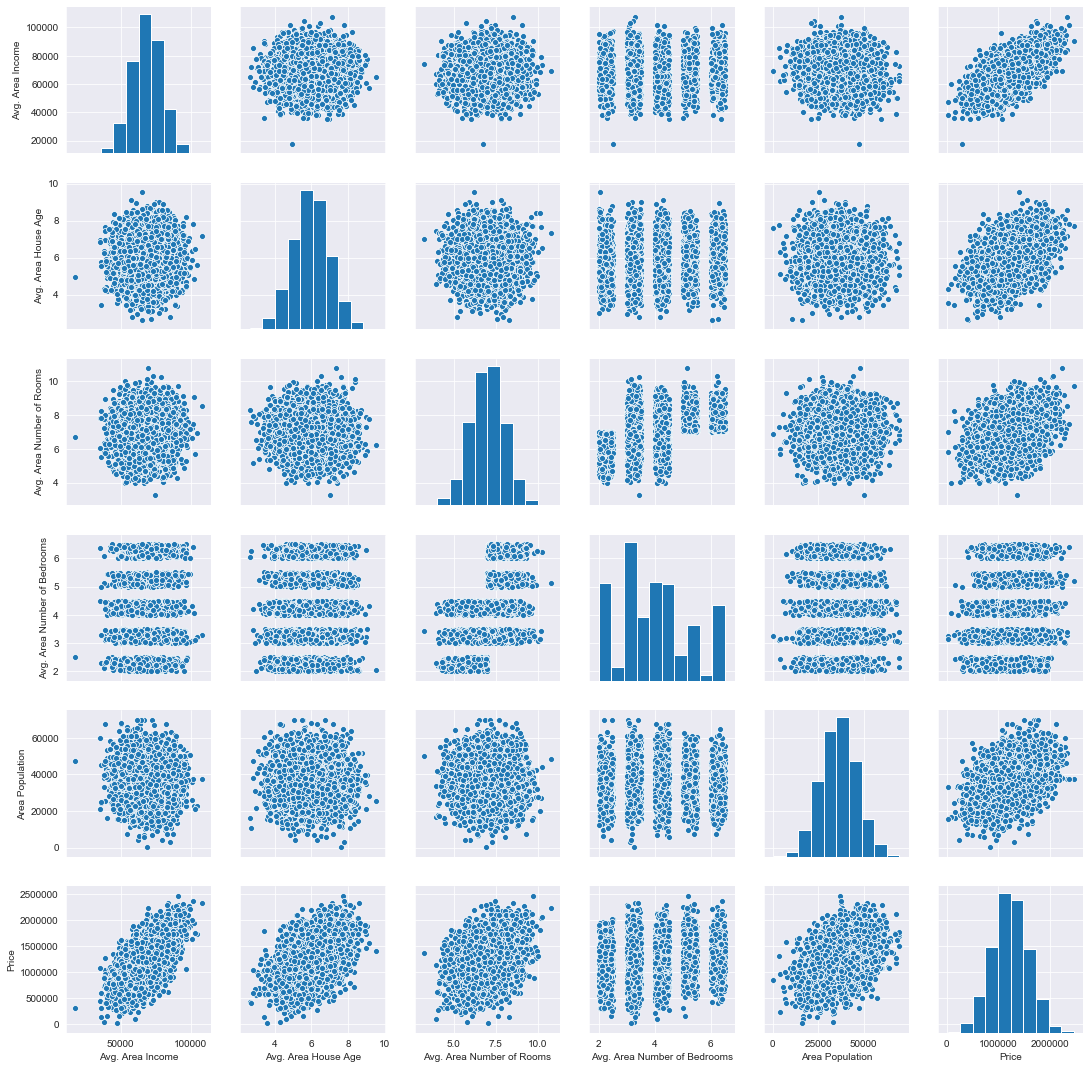

In [35]:
## Create pair plot across dataframe of each columns
sns.set_style('darkgrid')
sns.pairplot(usa_house_df)

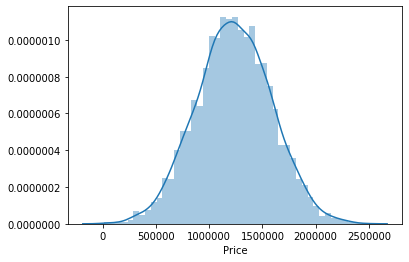

In [11]:
## Create distirubution plot on Price of the house which target variable
sns.distplot(usa_house_df.Price)

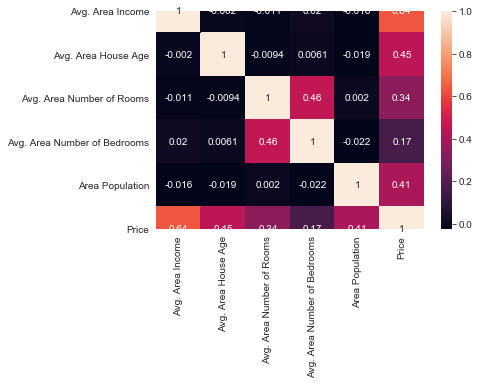

In [38]:
## heatmap based the corellation
sns.heatmap(usa_house_df.corr(),annot=True)

In [39]:
usa_house_df.columns


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [12]:
X=usa_house_df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms','Avg. Area Number of Bedrooms', 'Area Population']]

In [13]:
X.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
dtypes: float64(5)
memory usage: 195.4 KB


In [15]:
y=usa_house_df['Price']

In [16]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [17]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [19]:
## Training data will be used 70% and testing data will be used 30%, random_state=given number 
##will sync the dandom split to all who used this number for thier code. if you and me both used 101 then random split
## will be match for both y=mX+c , m=coefficient,c=intercept
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [21]:
## Instanciate the liner regression
lm=LinearRegression()

In [22]:
## Fit my model into training data
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [55]:
print(lm.intercept_)

-2641372.66730168


In [23]:
print(lm.coef_)

[2.16176350e+01 1.65221120e+05 1.21405377e+05 1.31871878e+03
 1.52251955e+01]


In [24]:
## Assign coeffcient for each independent dataset (X columns)
cdf=pd.DataFrame(data=lm.coef_,index=X_train.columns,columns=['coeff'])

In [25]:
cdf

,coeff
Avg. Area Income,21.617635
Avg. Area House Age,165221.119872
Avg. Area Number of Rooms,121405.376596
Avg. Area Number of Bedrooms,1318.718783
Area Population,15.225196


In [34]:
## Import the real dataset of house pricing  from boston area using sklearn
from sklearn.datasets import load_boston

In [35]:
boston=load_boston() ## its dictionary 

In [36]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [37]:
## Prediction
## Predict the values of X_test
prediction=lm.predict(X_test)

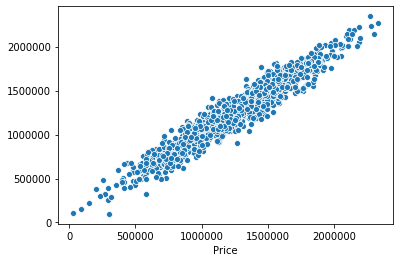

In [38]:
## Lets create a scatter plot between actual price and predicted price.Scatter plot looks good because of straight line
sns.scatterplot(y_test,prediction)

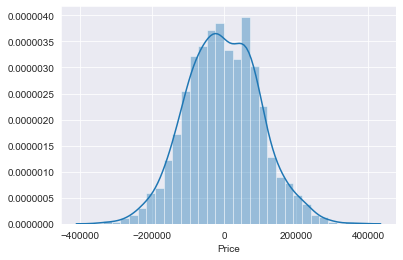

In [41]:
## lets plot  distribution plot on(actual price of test data - prediction).looks like little odd behaviour on data
sns.set_style('darkgrid')
sns.distplot((y_test-prediction))


In [42]:
## Regression evaulation metrics
from sklearn import metrics

In [45]:
## Find the mean absolute error
metrics.mean_absolute_error(y_test,prediction)

81257.55795856063

In [46]:
## Find the mean square error
metrics.mean_squared_error(y_test,prediction)

10169125565.897728

In [47]:
## Find the square root mean square error
np.sqrt(metrics.mean_squared_error(y_test,prediction))

100842.08231635108